In [1]:
#basic libraries
import os
import pandas as pd 
import numpy as np
import requests
import json
import glob
import pickle

#Visiualization and ML libraries
import sklearn
import matplotlib.pyplot as plt

from scipy.stats import norm
import statistics
import seaborn as sns

In [2]:
# Get the current working directory (cwd)
cwd = os.getcwd()  
# Get all the files in that directory
files = os.listdir(cwd)  
print("Files in %r: %s" % (cwd, files))

Files in '/Users/sandrobarreshamers/Thesis_IS_fake_news/Notebooks': ['PIPE_LINE_V3.py', 'Pipe_line_v1.ipynb', 'expecting the data.ipynb', 'Liar expecting data.ipynb', '.DS_Store', 'Liar dataset preprocess.ipynb', '__pycache__', 'compute_scores_pipeline.py', '.ipynb_checkpoints', 'Pipe_Line.py']


In [3]:
df = pd.read_csv('/Users/sandrobarreshamers/Thesis_IS_fake_news/ThesisData/Data/Computed_liar.csv')

In [4]:
df.head()

,Unnamed: 0,json_id,claim,object,flesch_kincaid_reading_ease,compressed_size,vader_neg,vader_neu,vader_pos,vader_compound
0,0,10540.json,half-true,When did the decline of coal start? It started...,71.815000,11443.0,0.000,0.902,0.098,0.3612
1,1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",71.781579,9089.0,0.107,0.687,0.206,0.3182
2,2,1123.json,false,Health care reform legislation is likely to ma...,53.655000,5511.0,0.000,0.606,0.394,0.7579
3,3,9028.json,half-true,The economic turnaround started at the end of ...,61.325000,4708.0,0.000,1.000,0.000,0.0000
4,4,12465.json,true,The Chicago Bears have had more starting quart...,54.096667,12205.0,0.119,0.828,0.053,-0.4601


In [5]:
def condition(x):
    if x =='false':
        return 0
    elif x== 'half-true':
        return 1
    elif x== 'mostly-true':
        return 2
    elif x=='true':
        return 3
    elif x =='barely-true':
        return 4
    else:
        return 5

In [6]:
# Applying the conditions
df['binary label'] = df['claim'].apply(condition)
 
df.head()

,Unnamed: 0,json_id,claim,object,flesch_kincaid_reading_ease,compressed_size,vader_neg,vader_neu,vader_pos,vader_compound,binary label
0,0,10540.json,half-true,When did the decline of coal start? It started...,71.815000,11443.0,0.000,0.902,0.098,0.3612,1
1,1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",71.781579,9089.0,0.107,0.687,0.206,0.3182,2
2,2,1123.json,false,Health care reform legislation is likely to ma...,53.655000,5511.0,0.000,0.606,0.394,0.7579,0
3,3,9028.json,half-true,The economic turnaround started at the end of ...,61.325000,4708.0,0.000,1.000,0.000,0.0000,1
4,4,12465.json,true,The Chicago Bears have had more starting quart...,54.096667,12205.0,0.119,0.828,0.053,-0.4601,3


Number of false statements: 1994
Number of half true statements: 2114
Number of mostly true statements: 1962
Number of true statements: 1676
Number of barely true statements: 1654
Number of pants-fire true statements: 839


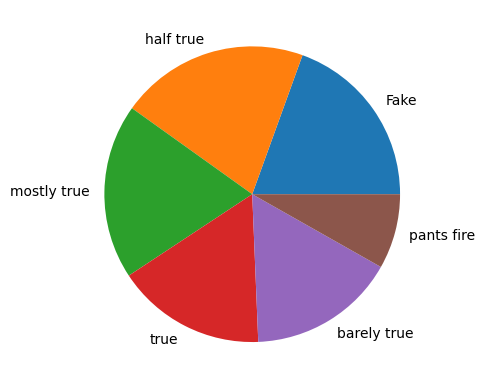

In [7]:

count_false = len(df[df['claim']=='false'])
print("Number of false statements:", count_false)

count_half_true = len(df[df['claim']=='half-true'])
print("Number of half true statements:", count_half_true )

count_mostly_true = len(df[df['claim']=='mostly-true'])
print("Number of mostly true statements:", count_mostly_true)

count_true = len(df[df['claim']=='true'])
print("Number of true statements:", count_true)

count_barely_true = len(df[df['claim']=='barely-true'])
print("Number of barely true statements:", count_barely_true)

count_pants_fire = len(df[df['claim']=='pants-fire'])
print("Number of pants-fire true statements:", count_pants_fire)


y = np.array([count_false, count_half_true, count_mostly_true,count_true,count_barely_true, count_pants_fire ])
mylabels = ["Fake", "half true",'mostly true','true', 'barely true', 'pants fire' ]

plt.pie(y, labels = mylabels)
plt.show()

In [8]:
def compute_statistics(list):
    mo = statistics.mode(list)
    mu = np.mean(list)
    sigma = np.std(list)
    me = statistics.median(list)
    
    return mo, mu, sigma, me

In [9]:
#generic datasets
df_fake = df[(df['claim'] == 'false')|(df['claim'] == 'pants-fire')]
df_true = df[(df['claim'] == 'true')|(df['claim'] == 'mostly-true')]
df_half_and_barely_true = df[(df['claim'] == 'barely-true')|(df['claim'] == 'half-true')]



In [10]:
df_test = df[(df['claim'] == 'false')|(df['claim'] == 'pants-fire')|(df['claim'] == 'true')|(df['claim'] == 'mostly-true')]
df_test.head()

,Unnamed: 0,json_id,claim,object,flesch_kincaid_reading_ease,compressed_size,vader_neg,vader_neu,vader_pos,vader_compound,binary label
1,1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",71.781579,9089.0,0.107,0.687,0.206,0.3182,2
2,2,1123.json,false,Health care reform legislation is likely to ma...,53.655000,5511.0,0.000,0.606,0.394,0.7579,0
4,4,12465.json,true,The Chicago Bears have had more starting quart...,54.096667,12205.0,0.119,0.828,0.053,-0.4601,3
8,8,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,57.605000,9587.0,0.000,1.000,0.000,0.0000,2
9,9,7115.json,mostly-true,"For the first time in history, the share of th...",60.634286,9272.0,0.000,0.792,0.208,0.6124,2


In [32]:
def condition2(x):
    if x == 'mostly-true':
        return 1
    elif x== 'true' :
        return 1
    elif x== 'pants-fire':
        return 0
    elif x== 'false':
        return 0

In [33]:
# Applying the conditions
df_test['binary label'] = df_test['claim'].apply(condition2)
df_test.head()

/var/folders/0q/8tgppr255xx8v40x26xhhmhr0000gn/T/ipykernel_55527/508820528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['binary label'] = df_test['claim'].apply(condition2)


,Unnamed: 0,json_id,claim,object,flesch_kincaid_reading_ease,compressed_size,vader_neg,vader_neu,vader_pos,vader_compound,binary label
1,1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",71.781579,9089.0,0.107,0.687,0.206,0.3182,1
2,2,1123.json,false,Health care reform legislation is likely to ma...,53.655000,5511.0,0.000,0.606,0.394,0.7579,0
4,4,12465.json,true,The Chicago Bears have had more starting quart...,54.096667,12205.0,0.119,0.828,0.053,-0.4601,1
8,8,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,57.605000,9587.0,0.000,1.000,0.000,0.0000,1
9,9,7115.json,mostly-true,"For the first time in history, the share of th...",60.634286,9272.0,0.000,0.792,0.208,0.6124,1


Number of false statements: 3638
Number of  true statements: 2114


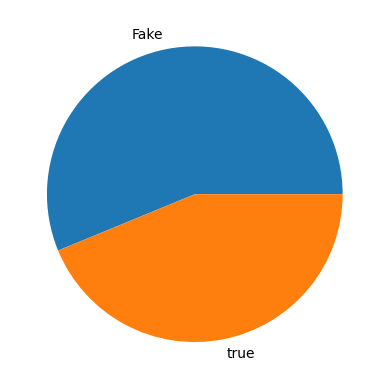

In [34]:
count_false = len(df_test[df_test['binary label']==1])
print("Number of false statements:", count_false)

count_true = len(df_test[df_test['binary label']==0])
print("Number of  true statements:", count_half_true )

y = np.array([count_false, count_true])
mylabels = ["Fake", "true"]

plt.pie(y, labels = mylabels)
plt.show()

In [35]:
df_compute_test = df_test

## Readability distribution fake claims

In [42]:
fke_values_fake = df_fake['flesch_kincaid_reading_ease'].tolist()

mo, mu, sigma, me = compute_statistics(fke_values_fake)


x_fake = np.linspace(min(fke_values_fake), max(fke_values_fake), 2050)
y_fake = norm.pdf(x_fake, mu, sigma)

fke_values_fake_formatted = [
    item for item in fke_values_fake
    if item > 0
    and item < 100
]

x_fake_formatted = np.linspace(min(fke_values_fake_formatted), max(fke_values_fake_formatted), 2050)
y_fake_formatted = norm.pdf(x_fake_formatted, mu, sigma)



   mo_formatted  mu_formatted  sigma_formatted  me_formatted
0        60.705     56.146784        20.001253     56.798846


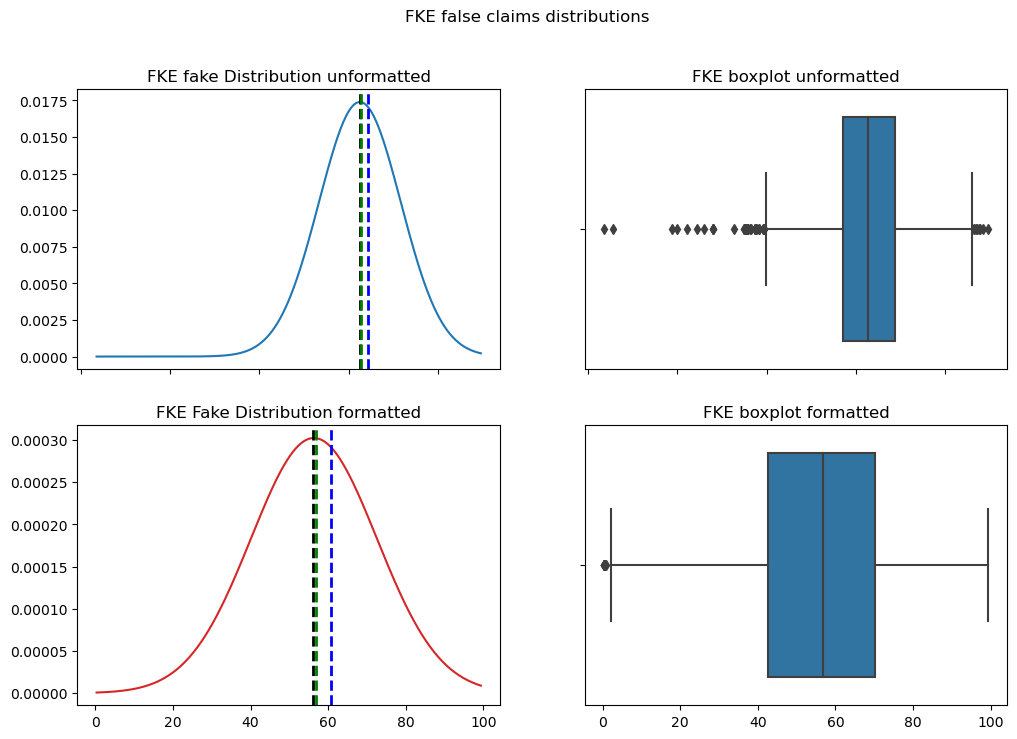

In [43]:
mo_unf, mu_unf, sigma_unf, me_unf = compute_statistics(fke_values_fake)

mo_format, mu_format, sigma_format, me_format = compute_statistics(fke_values_fake_formatted)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('FKE false claims distributions')



ax1.plot(x_fake , y_fake)
ax1.set_title('FKE fake Distribution unformatted')
ax1.axvline(mu_unf, color='black', linestyle='dashed', linewidth=2)
ax1.axvline(mo_unf, color='blue', linestyle='dashed', linewidth=2)
ax1.axvline(me_unf, color='green', linestyle='dashed', linewidth=2)

sns.boxplot(fke_values_fake, orient='h', ax=ax2)
ax2.set_title('FKE boxplot unformatted')

ax3.plot(x_fake_formatted, y_fake_formatted**2, 'tab:red')
ax3.set_title('FKE Fake Distribution formatted')
ax3.axvline(mu_format, color='black', linestyle='dashed', linewidth=2)
ax3.axvline(mo_format, color='blue', linestyle='dashed', linewidth=2)
ax3.axvline(me_format, color='green', linestyle='dashed', linewidth=2)


sns.boxplot(fke_values_fake_formatted, orient='h', ax=ax4)
ax4.set_title('FKE boxplot formatted')


for ax in fig.get_axes():
    ax.label_outer()

    
import pandas as pd



# create a dictionary with the values
statistics_dict = {'mo_formatted': mo_format, 
                   'mu_formatted': mu_format, 
                   'sigma_formatted': sigma_format, 
                   'me_formatted': me_format}

# create a new dataframe with the dictionary
df_statistics = pd.DataFrame(statistics_dict, index=[0])

# print the dataframe
print(df_statistics)


# FKE readbility true claims


In [45]:
fke_values_true = df_true['flesch_kincaid_reading_ease'].tolist()

mo, mu, sigma, me = compute_statistics(fke_values_true)

x_true= np.linspace(min(fke_values_true), max(fke_values_true), 2050)
y_true = norm.pdf(x_true, mu, sigma)

fke_values_true_formatted = [
    item for item in fke_values_true
    if item > 0
    and item < 100
]

mo, mu, sigma, me = compute_statistics(fke_values_fake_formatted)

x_true_formatted = np.linspace(min(fke_values_true_formatted), max(fke_values_true_formatted), 2050)
y_true_formatted = norm.pdf(x_true_formatted, mu, sigma)




   mo_formatted  mu_formatted  sigma_formatted  me_formatted
0     69.993846     59.902804        19.717358        61.325


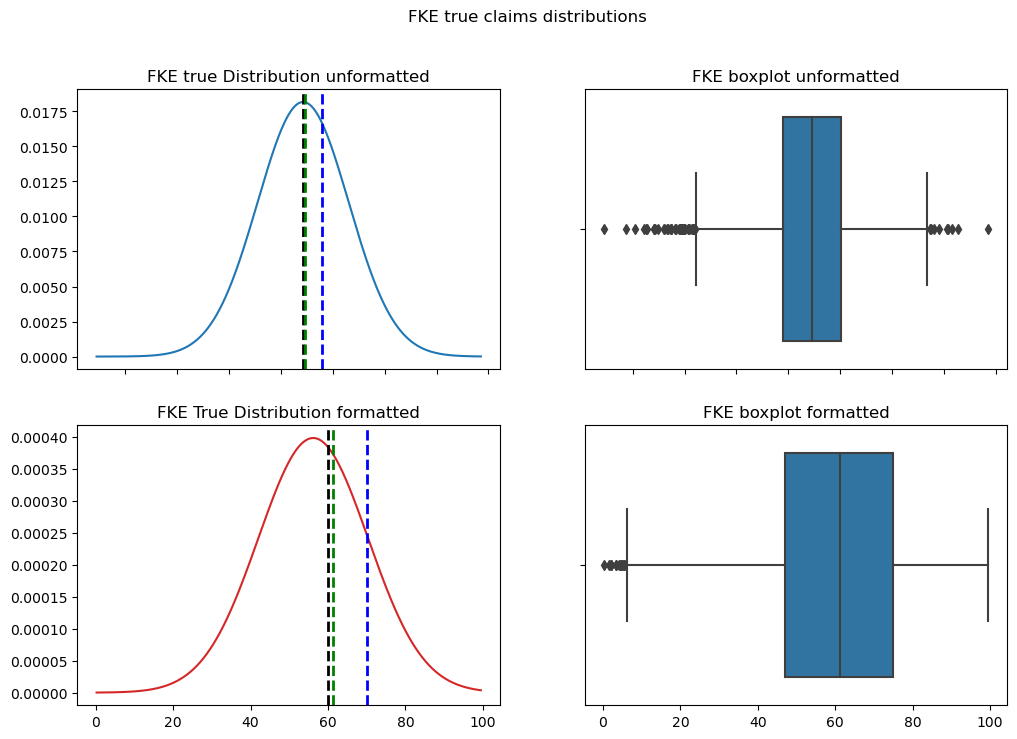

In [115]:
mo_unf, mu_unf, sigma_unf, me_unf = compute_statistics(fke_values_true)

mo_format, mu_format, sigma_format, me_format = compute_statistics(fke_values_true_formatted)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('FKE true claims distributions')



ax1.plot(x_true , y_true)
ax1.set_title('FKE true Distribution unformatted')
ax1.axvline(mu_unf, color='black', linestyle='dashed', linewidth=2)
ax1.axvline(mo_unf, color='blue', linestyle='dashed', linewidth=2)
ax1.axvline(me_unf, color='green', linestyle='dashed', linewidth=2)

sns.boxplot(fke_values_true, orient='h', ax=ax2)
ax2.set_title('FKE boxplot unformatted')

ax3.plot(x_true_formatted, y_true_formatted**2, 'tab:red')
ax3.set_title('FKE True Distribution formatted')
ax3.axvline(mu_format, color='black', linestyle='dashed', linewidth=2)
ax3.axvline(mo_format, color='blue', linestyle='dashed', linewidth=2)
ax3.axvline(me_format, color='green', linestyle='dashed', linewidth=2)


sns.boxplot(fke_values_true_formatted, orient='h', ax=ax4)
ax4.set_title('FKE boxplot formatted')


for ax in fig.get_axes():
    ax.label_outer()



statistics_dict = {'mo_formatted': mo_format, 
                   'mu_formatted': mu_format, 
                   'sigma_formatted': sigma_format, 
                   'me_formatted': me_format}


df_statistics = pd.DataFrame(statistics_dict, index=[0])

# print the dataframe
print(df_statistics)


## False vs True claims and the corresponding FKE values

KS test statistic: 1.0
p-value: 0.0


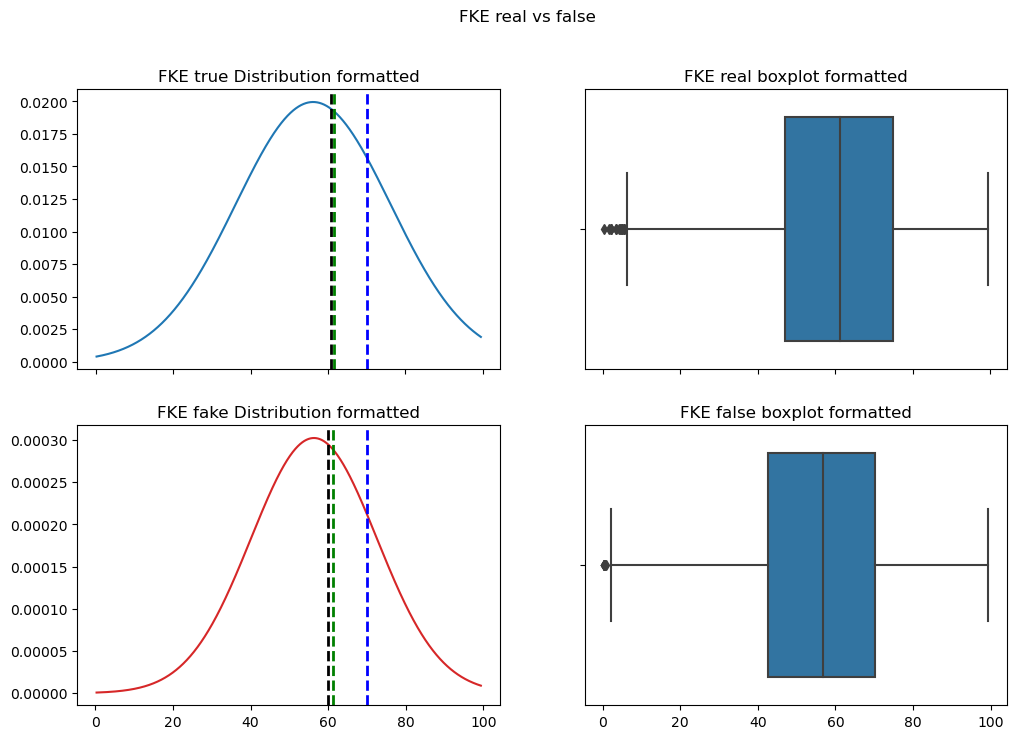

In [46]:
mo_unf, mu_unf, sigma_unf, me_unf = compute_statistics(fke_values_true)

mo_format, mu_format, sigma_format, me_format = compute_statistics(fke_values_true_formatted)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('FKE real vs false')



ax1.plot(x_true_formatted , y_true_formatted)
ax1.set_title('FKE true Distribution formatted')
ax1.axvline(mu_unf, color='black', linestyle='dashed', linewidth=2)
ax1.axvline(mo_unf, color='blue', linestyle='dashed', linewidth=2)
ax1.axvline(me_unf, color='green', linestyle='dashed', linewidth=2)

sns.boxplot(fke_values_true_formatted, orient='h', ax=ax2)
ax2.set_title('FKE real boxplot formatted')

ax3.plot(x_fake_formatted, y_fake_formatted**2, 'tab:red')
ax3.set_title('FKE fake Distribution formatted')
ax3.axvline(mu_format, color='black', linestyle='dashed', linewidth=2)
ax3.axvline(mo_format, color='blue', linestyle='dashed', linewidth=2)
ax3.axvline(me_format, color='green', linestyle='dashed', linewidth=2)


sns.boxplot(fke_values_fake_formatted, orient='h', ax=ax4)
ax4.set_title('FKE false boxplot formatted')


for ax in fig.get_axes():
    ax.label_outer()
    
from scipy.stats import ks_2samp

stat, p_value = ks_2samp(y_true_formatted, y_fake_formatted**2)
print("KS test statistic:", stat)
print("p-value:", p_value)



# Information complexity False

In [24]:
info_C_values_fake = df_fake['compressed_size'].tolist()

mo, mu, sigma, me = compute_statistics(info_C_values_fake)


x_fake = np.linspace(min(info_C_values_fake), max(info_C_values_fake), 2050)
y_fake = norm.pdf(x_fake, mu, sigma)

info_C_values_fake_formatted = [
    item for item in info_C_values_fake
    if item > 0
    and item < 16000
]

mo, mu, sigma, me = compute_statistics(info_C_values_fake_formatted)

x_false_formatted = np.linspace(min(info_C_values_fake_formatted), max(info_C_values_fake_formatted), 2050)
y_false_formatted = norm.pdf(x_false_formatted, mu, sigma)



   mo_formatted  mu_formatted  sigma_formatted  me_formatted
0        6015.0   7810.196312      2952.331611        7256.0


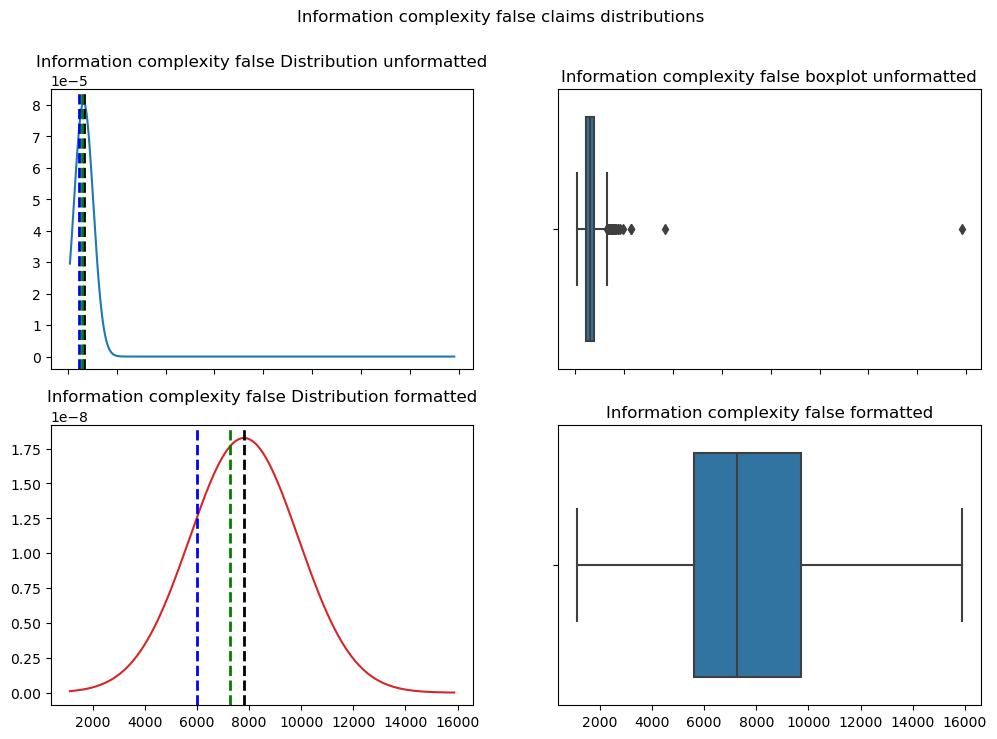

In [25]:
mo_unf, mu_unf, sigma_unf, me_unf = compute_statistics(info_C_values_fake)

mo_format, mu_format, sigma_format, me_format = compute_statistics(info_C_values_fake_formatted)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Information complexity false claims distributions')



ax1.plot(x_fake , y_fake)
ax1.set_title('Information complexity false Distribution unformatted')
ax1.axvline(mu_unf, color='black', linestyle='dashed', linewidth=2)
ax1.axvline(mo_unf, color='blue', linestyle='dashed', linewidth=2)
ax1.axvline(me_unf, color='green', linestyle='dashed', linewidth=2)

sns.boxplot(info_C_values_fake, orient='h', ax=ax2)
ax2.set_title('Information complexity false boxplot unformatted')

ax3.plot(x_false_formatted, y_false_formatted**2, 'tab:red')
ax3.set_title('Information complexity false Distribution formatted')
ax3.axvline(mu_format, color='black', linestyle='dashed', linewidth=2)
ax3.axvline(mo_format, color='blue', linestyle='dashed', linewidth=2)
ax3.axvline(me_format, color='green', linestyle='dashed', linewidth=2)


sns.boxplot(info_C_values_fake_formatted, orient='h', ax=ax4)
ax4.set_title('Information complexity false formatted')


for ax in fig.get_axes():
    ax.label_outer()



statistics_dict = {'mo_formatted': mo_format, 
                   'mu_formatted': mu_format, 
                   'sigma_formatted': sigma_format, 
                   'me_formatted': me_format}


df_statistics = pd.DataFrame(statistics_dict, index=[0])

# print the dataframe
print(df_statistics)


## information complexity values for true claims

In [26]:
info_C_values_real = df_true['compressed_size'].tolist()

mo, mu, sigma, me = compute_statistics(info_C_values_real)


x_true = np.linspace(min(info_C_values_real), max(info_C_values_real), 2050)
y_true = norm.pdf(x_fake, mu, sigma)

info_C_values_real_formatted = [
    item for item in info_C_values_real
    if item > 0
    and item < 16000
]

mo, mu, sigma, me = compute_statistics(info_C_values_real_formatted)

x_true_formatted = np.linspace(min(info_C_values_real_formatted), max(info_C_values_real_formatted), 2050)
y_true_formatted = norm.pdf(x_false_formatted, mu, sigma)



   mo_formatted  mu_formatted  sigma_formatted  me_formatted
0        6003.0   8252.921418      2861.206634        7891.0


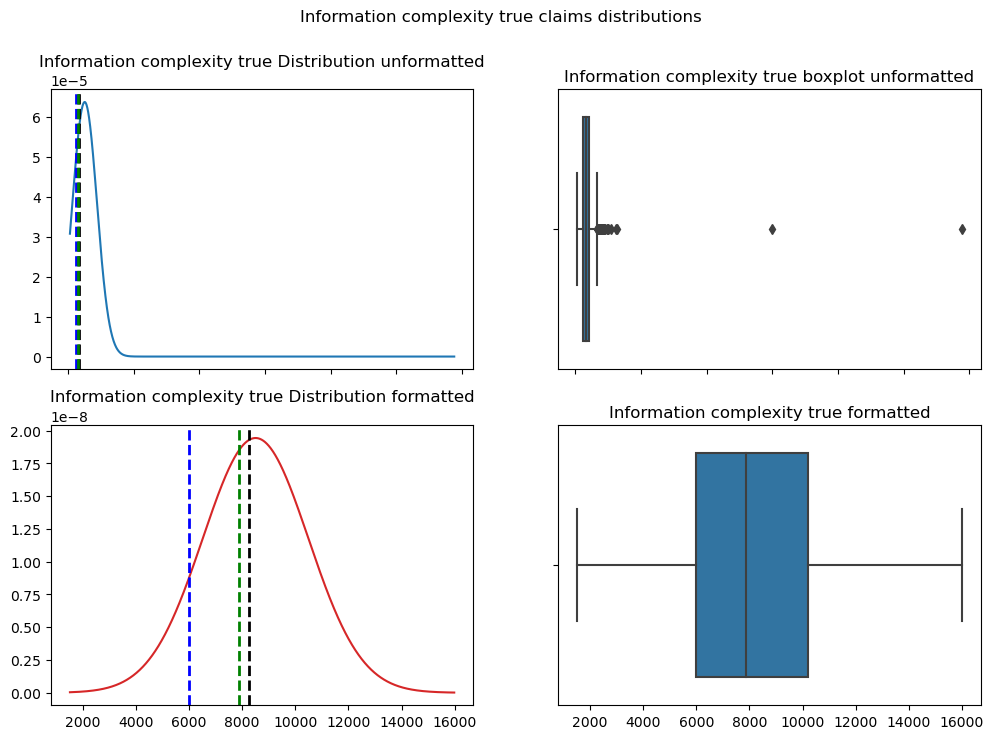

In [27]:
mo_unf, mu_unf, sigma_unf, me_unf = compute_statistics(info_C_values_real)

mo_format, mu_format, sigma_format, me_format = compute_statistics(info_C_values_real_formatted)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Information complexity true claims distributions')



ax1.plot(x_true , y_true)
ax1.set_title('Information complexity true Distribution unformatted')
ax1.axvline(mu_unf, color='black', linestyle='dashed', linewidth=2)
ax1.axvline(mo_unf, color='blue', linestyle='dashed', linewidth=2)
ax1.axvline(me_unf, color='green', linestyle='dashed', linewidth=2)

sns.boxplot(info_C_values_real, orient='h', ax=ax2)
ax2.set_title('Information complexity true boxplot unformatted')

ax3.plot(x_true_formatted, y_true_formatted**2, 'tab:red')
ax3.set_title('Information complexity true Distribution formatted')
ax3.axvline(mu_format, color='black', linestyle='dashed', linewidth=2)
ax3.axvline(mo_format, color='blue', linestyle='dashed', linewidth=2)
ax3.axvline(me_format, color='green', linestyle='dashed', linewidth=2)


sns.boxplot(info_C_values_real_formatted, orient='h', ax=ax4)
ax4.set_title('Information complexity true formatted')


for ax in fig.get_axes():
    ax.label_outer()



statistics_dict = {'mo_formatted': mo_format, 
                   'mu_formatted': mu_format, 
                   'sigma_formatted': sigma_format, 
                   'me_formatted': me_format}


df_statistics = pd.DataFrame(statistics_dict, index=[0])

# print the dataframe
print(df_statistics)


## False vs True claims and the corresponding info complexity

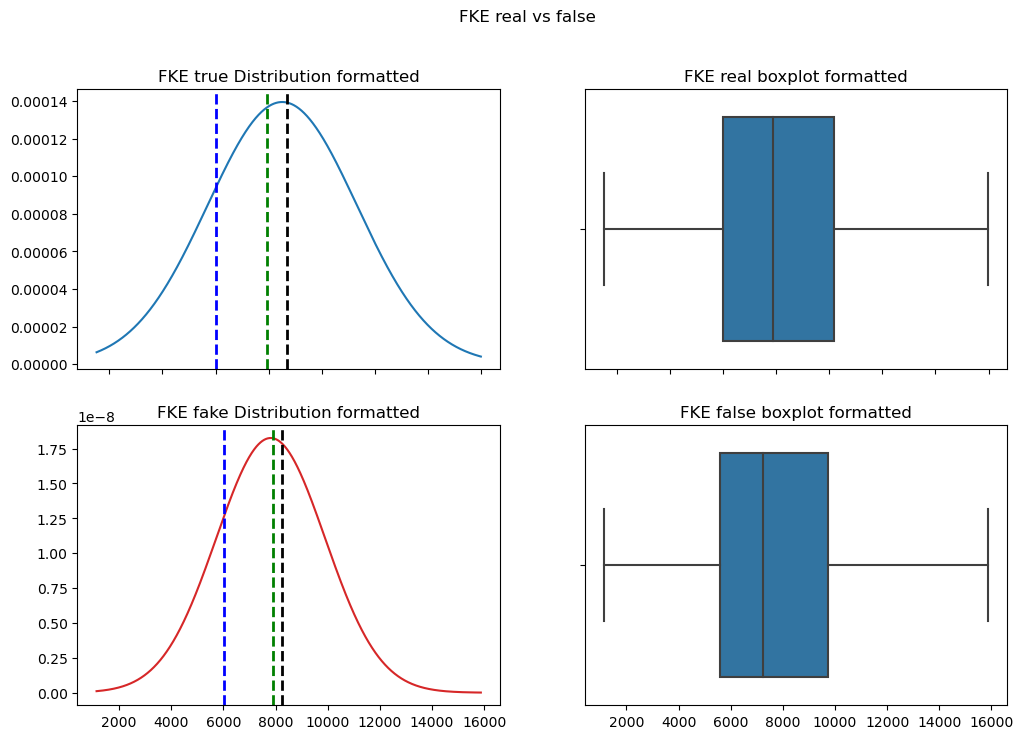

In [29]:
mo_c_real, mu_c_real, sigma_c_real, me_c_real = compute_statistics(info_C_values_real_formatted)

mo_c_false, mu_c_false, sigma_c_false, me_c_false = compute_statistics(info_C_values_fake_formatted)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('FKE real vs false')



ax1.plot(x_true_formatted , y_true_formatted)
ax1.set_title('FKE true Distribution formatted')
ax1.axvline(mu_unf, color='black', linestyle='dashed', linewidth=2)
ax1.axvline(mo_unf, color='blue', linestyle='dashed', linewidth=2)
ax1.axvline(me_unf, color='green', linestyle='dashed', linewidth=2)

sns.boxplot(info_C_values_real_formatted, orient='h', ax=ax2)
ax2.set_title('FKE real boxplot formatted')

ax3.plot(x_false_formatted, y_false_formatted**2, 'tab:red')
ax3.set_title('FKE fake Distribution formatted')
ax3.axvline(mu_format, color='black', linestyle='dashed', linewidth=2)
ax3.axvline(mo_format, color='blue', linestyle='dashed', linewidth=2)
ax3.axvline(me_format, color='green', linestyle='dashed', linewidth=2)


sns.boxplot(info_C_values_fake_formatted, orient='h', ax=ax4)
ax4.set_title('FKE false boxplot formatted')


for ax in fig.get_axes():
    ax.label_outer()
    
from scipy.stats import ks_2samp



## Sentiment score

Text(0.5, 1.0, 'Distribution of Vader Scores')

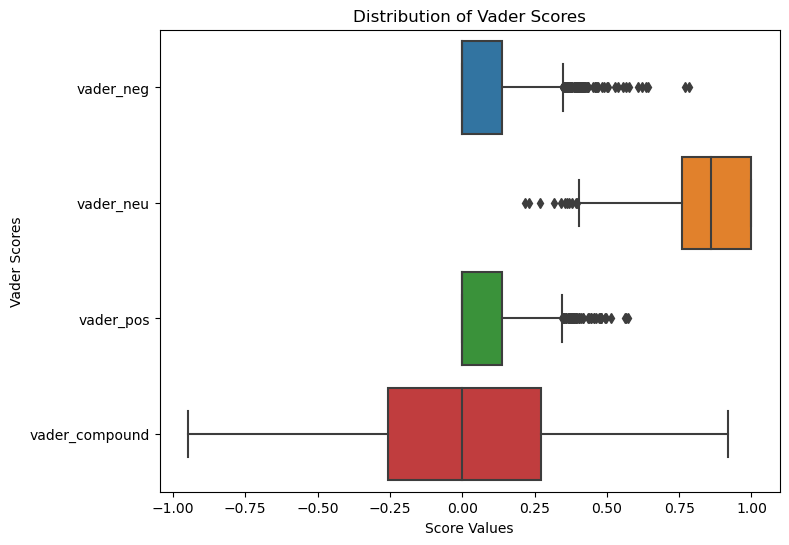

In [78]:
import seaborn as sns

# Select the columns with the Vader sentiment scores
vader_cols = ['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']

# Create a horizontal boxplot using Seaborn
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df_fake[vader_cols], orient='h', ax=ax)

# Set the labels and title
ax.set_ylabel('Vader Scores')
ax.set_xlabel('Score Values')
ax.set_title('Distribution of Vader Scores')


Text(0.5, 1.0, 'Distribution of Vader Scores')

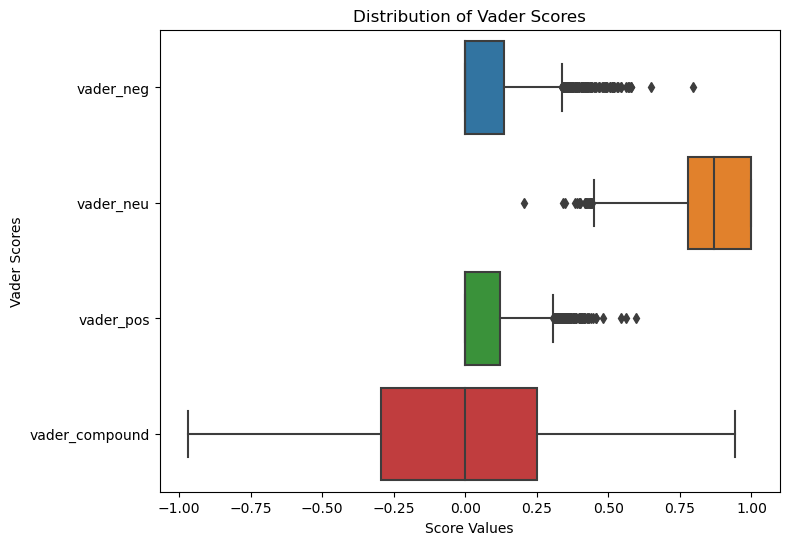

In [79]:
# Select the columns with the Vader sentiment scores
vader_cols = ['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']

# Create a horizontal boxplot using Seaborn
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df_true[vader_cols], orient='h', ax=ax)

# Set the labels and title
ax.set_ylabel('Vader Scores')
ax.set_xlabel('Score Values')
ax.set_title('Distribution of Vader Scores')


## Making FKE absolute

In [42]:
def FKE_condition(x):
     if x <= 30:
        return 0
     elif x<= 50:
        return 1
     elif x<= 60:
        return 2
     elif x<= 70:
        return 3
     elif x<= 80:
        return 4
     elif x<= 90:
        return 5
     else :
        return 6
  

In [44]:
df_compute_test['FKE_Label'] = df_compute_test['flesch_kincaid_reading_ease'].apply(FKE_condition)
df_compute_test.head()

/var/folders/0q/8tgppr255xx8v40x26xhhmhr0000gn/T/ipykernel_55527/743673907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compute_test['FKE_Label'] = df_compute_test['flesch_kincaid_reading_ease'].apply(FKE_condition)


,Unnamed: 0,json_id,claim,object,flesch_kincaid_reading_ease,compressed_size,vader_neg,vader_neu,vader_pos,vader_compound,binary label,FKE_Label
1,1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",71.781579,9089.0,0.107,0.687,0.206,0.3182,1,4
2,2,1123.json,false,Health care reform legislation is likely to ma...,53.655000,5511.0,0.000,0.606,0.394,0.7579,0,2
4,4,12465.json,true,The Chicago Bears have had more starting quart...,54.096667,12205.0,0.119,0.828,0.053,-0.4601,1,2
8,8,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,57.605000,9587.0,0.000,1.000,0.000,0.0000,1,2
9,9,7115.json,mostly-true,"For the first time in history, the share of th...",60.634286,9272.0,0.000,0.792,0.208,0.6124,1,3


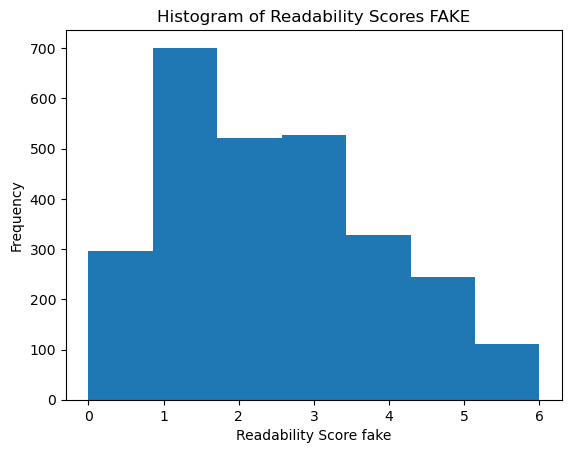

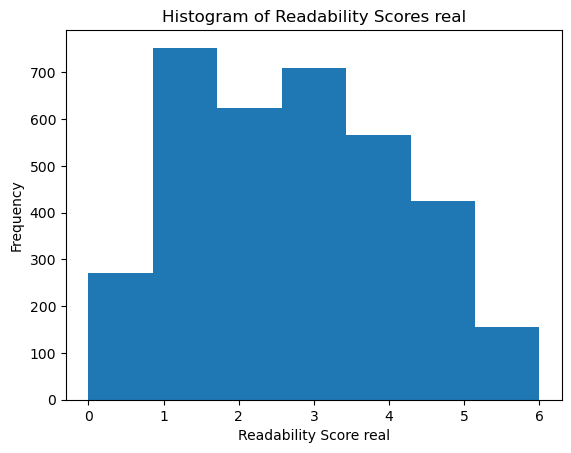

In [74]:
df_fake_2 = df_compute_test[(df_compute_test['claim'] == 'false')|(df_compute_test['claim'] == 'pants-fire')]
df_true_2 = df_compute_test[(df_compute_test['claim'] == 'true')|(df_compute_test['claim'] == 'mostly-true')]
df_filtered_fake_2 = df_fake_2[(df_fake_2['flesch_kincaid_reading_ease'] >= 0) & (df_fake_2['flesch_kincaid_reading_ease'] <= 100)]
df_filtered_real_2 = df_true_2[(df_true_2['flesch_kincaid_reading_ease'] >= 0) & (df_true_2['flesch_kincaid_reading_ease'] <= 100)]

fake_values = df_filtered_fake_2['FKE_Label']
plt.hist(fake_values, bins=7)
plt.xlabel('Readability Score fake')
plt.ylabel('Frequency')
plt.title('Histogram of Readability Scores FAKE')
plt.show()

real_values = df_filtered_real_2['FKE_Label']
plt.hist(real_values, bins=7)
plt.xlabel('Readability Score real')
plt.ylabel('Frequency')
plt.title('Histogram of Readability Scores real')
plt.show()



## ML model

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [49]:
df_filtered = df_compute_test[(df_compute_test['flesch_kincaid_reading_ease'] >= 0) & (df_compute_test['flesch_kincaid_reading_ease'] <= 100)]
df_filtered = df_compute_test[(df_compute_test['compressed_size'] >= 0) & (df_compute_test['compressed_size'] <= 16000)]




In [81]:
# Select relevant features
features = ['FKE_Label', 'compressed_size', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']
X = df_filtered[features]

# Create the target variable
y = df_filtered['binary label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features and normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

In [83]:
model = GaussianNB()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
cm =confusion_matrix(y_test, y_pred)

Accuracy: 0.5505791505791506


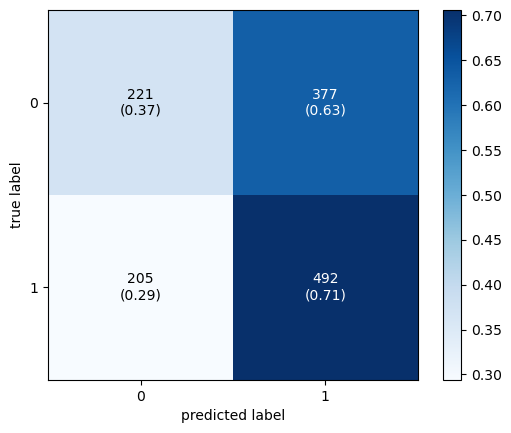

In [84]:
print('Accuracy:', accuracy)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

Accuracy: 0.5096525096525096


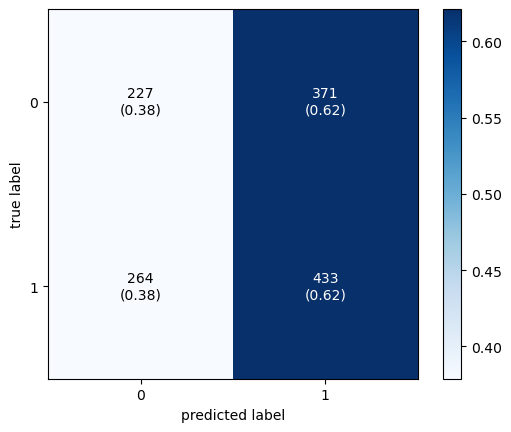

In [85]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


cm_2 =confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm_2,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)



In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Create the Gaussian Naive Bayes model
model = GaussianNB()

# Select relevant features
features = ['flesch_kincaid_reading_ease', 'compressed_size', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']
X = df_Liar_filtered[features]

# Create the target variable
y = df_Liar_filtered['binary label']

# Scale the features and normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set up the k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Use the cross_val_score function to calculate the accuracy scores for each fold
scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='accuracy')

# Print the average accuracy score and the standard deviation
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
